In [1]:
# load base toolkit
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#load data
data = pd.read_csv('..\DatasetForML.csv')

In [3]:
data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_OHCV,enginetype_ROTOR,fuelsystem_2BBL,fuelsystem_4BBL,fuelsystem_IDI,fuelsystem_MFI,fuelsystem_MPFI,fuelsystem_SPDI,fuelsystem_SPFI,price_category
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,1,0,0,1
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,1,0,0,1
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,1,0,0,1
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,1,0,0,1


In [4]:
data.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'brand_name_AUDI', 'brand_name_BMW',
       'brand_name_BUICK', 'brand_name_CHEVROLET', 'brand_name_DODGE',
       'brand_name_HONDA', 'brand_name_ISUZU', 'brand_name_JAGUAR',
       'brand_name_MAZDA', 'brand_name_MERCURY', 'brand_name_MITSUBISHI',
       'brand_name_NISSAN', 'brand_name_PEUGEOT', 'brand_name_PLYMOUTH',
       'brand_name_PORCSHCE', 'brand_name_PORSCHE', 'brand_name_RENAULT',
       'brand_name_SAAB', 'brand_name_SUBARU', 'brand_name_TOYOTA',
       'brand_name_VOLKSWAGEN', 'brand_name_VOLVO', 'fueltype_GAS',
       'aspiration_TURBO', 'carbody_HARDTOP', 'carbody_HATCHBACK',
       'carbody_SEDAN', 'carbody_WAGON', 'drivewheel_FWD', 'drivewheel_RWD',
       'enginelocation_REAR', 'enginetype_DOHCV', 'enginetype_L',
   

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   doornumber             205 non-null    int64  
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   cylindernumber         205 non-null    int64  
 8   enginesize             205 non-null    int64  
 9   boreratio              205 non-null    float64
 10  stroke                 205 non-null    float64
 11  compressionratio       205 non-null    float64
 12  horsepower             205 non-null    int64  
 13  peakrpm                205 non-null    int64  
 14  citympg                205 non-null    int64  
 15  highwa

In [7]:
# select X and y variables
X = data[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'brand_name_AUDI', 'brand_name_BMW',
       'brand_name_BUICK', 'brand_name_CHEVROLET', 'brand_name_DODGE',
       'brand_name_HONDA', 'brand_name_ISUZU', 'brand_name_JAGUAR',
       'brand_name_MAZDA', 'brand_name_MERCURY', 'brand_name_MITSUBISHI',
       'brand_name_NISSAN', 'brand_name_PEUGEOT', 'brand_name_PLYMOUTH',
       'brand_name_PORCSHCE', 'brand_name_PORSCHE', 'brand_name_RENAULT',
       'brand_name_SAAB', 'brand_name_SUBARU', 'brand_name_TOYOTA',
       'brand_name_VOLKSWAGEN', 'brand_name_VOLVO', 'fueltype_GAS',
       'aspiration_TURBO', 'carbody_HARDTOP', 'carbody_HATCHBACK',
       'carbody_SEDAN', 'carbody_WAGON', 'drivewheel_FWD', 'drivewheel_RWD',
       'enginelocation_REAR', 'enginetype_DOHCV', 'enginetype_L',
       'enginetype_OHC', 'enginetype_OHCF', 'enginetype_OHCV',
       'enginetype_ROTOR', 'fuelsystem_2BBL', 'fuelsystem_4BBL',
       'fuelsystem_IDI', 'fuelsystem_MFI', 'fuelsystem_MPFI',
       'fuelsystem_SPDI', 'fuelsystem_SPFI']]
y = data[['price_category']]

In [41]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=639)


In [9]:
X_train.shape

(164, 60)

In [10]:
y_train.shape

(164, 1)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

p_grid = [
        {'C': [1, 10, 50, 100, 1000], 'kernel': ['linear'], 'random_state': [639], 'probability': [True]},
        {'C': [1, 10, 50, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf', 'sigmoid'], 'random_state': [639], 'probability': [True]},
        {'C': [1, 10, 50, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4, 5, 6, 7], 'random_state': [639], 'probability': [True]}
        ]

grid_search = GridSearchCV(svc, p_grid, scoring= ['accuracy', 'roc_auc'], refit= 'accuracy', verbose=2)


In [44]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 85 candidates, totalling 425 fits
[CV] END C=1, kernel=linear, probability=True, random_state=639; total time=   0.0s
[CV] END C=1, kernel=linear, probability=True, random_state=639; total time=   0.0s
[CV] END C=1, kernel=linear, probability=True, random_state=639; total time=   0.0s
[CV] END C=1, kernel=linear, probability=True, random_state=639; total time=   0.0s
[CV] END C=1, kernel=linear, probability=True, random_state=639; total time=   0.0s
[CV] END C=10, kernel=linear, probability=True, random_state=639; total time=   0.0s
[CV] END C=10, kernel=linear, probability=True, random_state=639; total time=   0.0s
[CV] END C=10, kernel=linear, probability=True, random_state=639; total time=   0.0s
[CV] END C=10, kernel=linear, probability=True, random_state=639; total time=   0.0s
[CV] END C=10, kernel=linear, probability=True, random_state=639; total time=   0.0s
[CV] END C=50, kernel=linear, probability=True, random_state=639; total time=   0.0s
[CV] END

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 50, 100, 1000], 'kernel': ['linear'],
                          'probability': [True], 'random_state': [639]},
                         {'C': [1, 10, 50, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf', 'sigmoid'], 'probability': [True],
                          'random_state': [639]},
                         {'C': [1, 10, 50, 100, 1000],
                          'degree': [2, 3, 4, 5, 6, 7], 'kernel': ['poly'],
                          'probability': [True], 'random_state': [639]}],
             refit='accuracy', scoring=['accuracy', 'roc_auc'], verbose=2)

In [45]:
pd.set_option('display.max_columns', None)
grid_search_data = pd.DataFrame(grid_search.cv_results_)

In [46]:
grid_search_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_probability,param_random_state,param_gamma,param_degree,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.002332,0.001907,0.007472,0.003688,1,linear,True,639,NaN,NaN,"{'C': 1, 'kernel': 'linear', 'probability': Tr...",0.878788,0.909091,0.848485,0.848485,0.87500,0.871970,0.022524,30,0.988971,0.992647,0.930147,0.970588,0.968750,0.970221,0.022193,18
1,0.004260,0.006572,0.001307,0.001223,10,linear,True,639,NaN,NaN,"{'C': 10, 'kernel': 'linear', 'probability': T...",0.909091,0.909091,0.878788,0.939394,0.90625,0.908523,0.019199,6,0.988971,0.988971,0.944853,0.981618,0.957031,0.972289,0.018051,11
2,0.002182,0.002964,0.004218,0.005237,50,linear,True,639,NaN,NaN,"{'C': 50, 'kernel': 'linear', 'probability': T...",0.969697,0.878788,0.878788,0.969697,0.90625,0.920644,0.041288,1,0.996324,0.974265,0.944853,0.985294,0.953125,0.970772,0.019283,13
3,0.001428,0.001238,0.004494,0.004261,100,linear,True,639,NaN,NaN,"{'C': 100, 'kernel': 'linear', 'probability': ...",0.969697,0.878788,0.878788,0.969697,0.90625,0.920644,0.041288,1,0.996324,0.974265,0.944853,0.985294,0.953125,0.970772,0.019283,13
4,0.000610,0.001219,0.002988,0.004247,1000,linear,True,639,NaN,NaN,"{'C': 1000, 'kernel': 'linear', 'probability':...",0.969697,0.878788,0.878788,0.969697,0.90625,0.920644,0.041288,1,0.996324,0.974265,0.944853,0.985294,0.953125,0.970772,0.019283,13


In [47]:
grid_search_data.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'param_probability', 'param_random_state',
       'param_gamma', 'param_degree', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_roc_auc', 'split1_test_roc_auc',
       'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc',
       'mean_test_roc_auc', 'std_test_roc_auc', 'rank_test_roc_auc'],
      dtype='object')

In [48]:
grid_search_data[['param_kernel', 'mean_test_accuracy']].groupby('param_kernel').agg('max')

,mean_test_accuracy
param_kernel,
linear,0.920644
poly,0.884091
rbf,0.920265
sigmoid,0.914773


In [49]:
best_svc = grid_search.best_estimator_

In [50]:
grid_search.best_params_

{'C': 50, 'kernel': 'linear', 'probability': True, 'random_state': 639}

In [51]:
grid_search.best_score_

0.9206439393939394

In [52]:
best_svc.get_params

<bound method BaseEstimator.get_params of SVC(C=50, kernel='linear', probability=True, random_state=639)>

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
y_pred = best_svc.predict(X_test)
y_pred_proba = best_svc.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba[:,1])
print(f'Accuracy of the best SVC model: {accuracy}')
print(f'AUC of the best SVC model: {auc}')

Accuracy of the best SVC model: 0.926829268292683
AUC of the best SVC model: 0.9880952380952381


In [54]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [72]:
svc = SVC()

p_grid = [
        {'svc__C': [1, 10, 50, 100], 'svc__kernel': ['linear'], 'svc__random_state': [639]},
        {'svc__C': [1, 10, 50, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel': ['rbf', 'sigmoid'], 'svc__random_state': [639]},
        {'svc__C': [1, 10, 50, 100], 'svc__kernel': ['poly'], 'svc__degree': [2, 3, 4, 5], 'svc__random_state': [639]}
        ]

components = []
accuracies = []
parameters = []

for i in range(1,10):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    
    pipeline = Pipeline([('pca', pca), ('svc', svc)])
    grid_search = GridSearchCV(pipeline, p_grid, scoring= ['accuracy', 'roc_auc'], refit= 'accuracy', cv= 5)
    grid_search.fit(X_train_pca, y_train)

    best_model_pca = grid_search.best_estimator_
    params = grid_search.best_params_
    X_test_pca = pca.transform(X_test)
    y_pred_pca = best_model_pca.predict(X_test_pca)
    ac = accuracy_score(y_test, y_pred_pca)

    components.append(i)
    accuracies.append(ac)
    parameters.append(params)
    
    print(f'Accuracy with {i} PCA components: {ac}')


Accuracy with 1 PCA components: 0.9024390243902439
Accuracy with 2 PCA components: 0.9024390243902439
Accuracy with 3 PCA components: 0.926829268292683
Accuracy with 4 PCA components: 0.9024390243902439
Accuracy with 5 PCA components: 0.926829268292683
Accuracy with 6 PCA components: 0.9024390243902439
Accuracy with 7 PCA components: 0.926829268292683
Accuracy with 8 PCA components: 0.926829268292683
Accuracy with 9 PCA components: 0.926829268292683


In [77]:
accuracy_data = list(zip(components, accuracies))
accuracy_data = np.array(accuracy_data)
accuracy_data

array([[1.        , 0.90243902],
       [2.        , 0.90243902],
       [3.        , 0.92682927],
       [4.        , 0.90243902],
       [5.        , 0.92682927],
       [6.        , 0.90243902],
       [7.        , 0.92682927],
       [8.        , 0.92682927],
       [9.        , 0.92682927]])

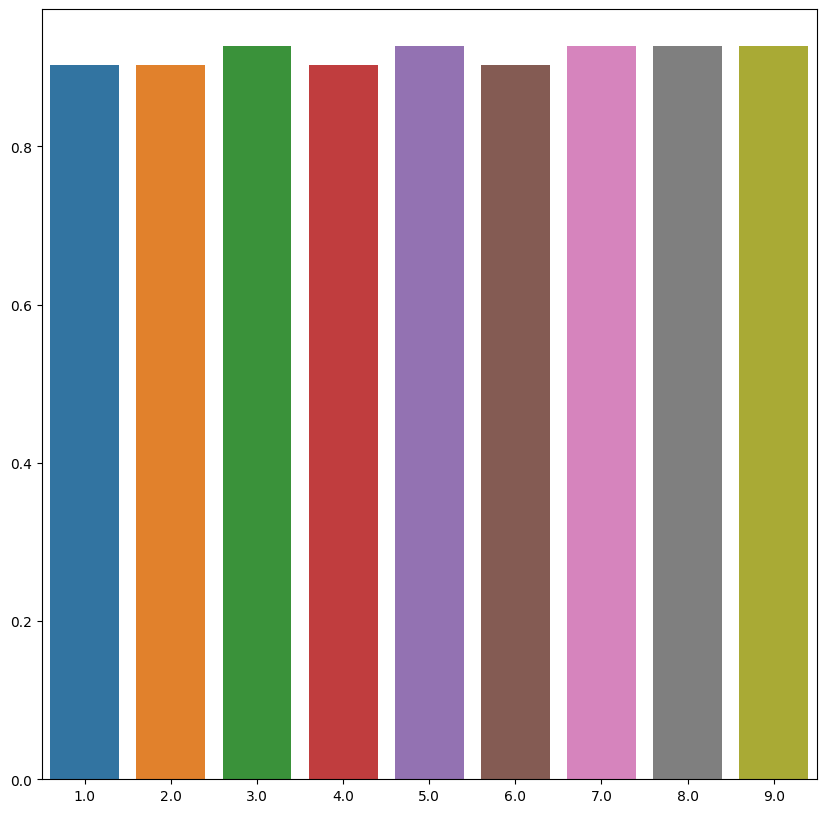

In [82]:
import seaborn as sns

plt.figure(figsize=(10,10))

sns.barplot(x=accuracy_data[:, 0], y=accuracy_data[:, 1])

plt.show()

In [55]:
## optimization with optuna
import optuna 
from sklearn.model_selection import cross_val_score

def objective(trial):

    n_components = trial.suggest_int('n_components', 1, 9)
    

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)

    svc_c = trial.suggest_loguniform('svc_c', 1e-5, 1e2)
    svc_kernel = trial.suggest_categorical('svc_kernel', ['linear', 'rbf', 'sigmoid', 'poly'])
    
    if svc_kernel == 'poly':
        svc_degree = trial.suggest_int('svc_degree', 2, 5)
    else:
        svc_degree = 3  
    

    classifier_obj = SVC(C=svc_c, kernel=svc_kernel, degree=svc_degree, gamma="auto", random_state=639)
    

    score = cross_val_score(classifier_obj, X_train_pca, y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


In [58]:
study = optuna.create_study(direction='maximize')  
study.optimize(objective, n_trials=100)

best_params = study.best_params
print(f"Mejores hiperparámetros: {best_params}")

best_accuracy = study.best_value
print(f"Mejor precisión: {best_accuracy}")

[I 2024-01-15 19:01:43,611] A new study created in memory with name: no-name-948d09a8-4f5f-4e31-80b1-0fb01b4626bb
[I 2024-01-15 19:01:43,644] Trial 0 finished with value: 0.6399551066217732 and parameters: {'n_components': 7, 'svc_c': 8.964256647500142e-05, 'svc_kernel': 'poly', 'svc_degree': 5}. Best is trial 0 with value: 0.6399551066217732.
[I 2024-01-15 19:01:43,678] Trial 1 finished with value: 0.8292929292929293 and parameters: {'n_components': 3, 'svc_c': 0.6390749841397457, 'svc_kernel': 'sigmoid'}. Best is trial 1 with value: 0.8292929292929293.
[I 2024-01-15 19:01:43,712] Trial 2 finished with value: 0.506060606060606 and parameters: {'n_components': 6, 'svc_c': 0.002439152844820291, 'svc_kernel': 'rbf'}. Best is trial 1 with value: 0.8292929292929293.
[I 2024-01-15 19:02:07,272] Trial 3 finished with value: 0.5729517396184063 and parameters: {'n_components': 1, 'svc_c': 26.379605838455042, 'svc_kernel': 'poly', 'svc_degree': 4}. Best is trial 1 with value: 0.8292929292929293

Mejores hiperparámetros: {'n_components': 3, 'svc_c': 4.331416314006635, 'svc_kernel': 'rbf'}
Mejor precisión: 0.914702581369248


In [67]:
from sklearn.model_selection import RandomizedSearchCV

svc = SVC()


p_grid = [
    {'svc__C': [1, 10, 50, 100], 'svc__kernel': ['linear'], 'svc__random_state': [639]},
    {'svc__C': [1, 10, 50, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel': ['rbf', 'sigmoid'], 'svc__random_state': [639]},
    {'svc__C': [1, 10, 50, 100], 'svc__kernel': ['poly'], 'svc__degree': [2, 3, 4, 5], 'svc__random_state': [639]}
]

components = []
accuracies = []
parameters = []

for i in range(1, 10):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    
    pipeline = Pipeline([('pca', pca), ('svc', svc)])
    
    randomized_search = RandomizedSearchCV(pipeline, p_grid, n_iter=10, scoring=['accuracy', 'roc_auc'], refit='accuracy', cv=5, random_state=42)
    randomized_search.fit(X_train_pca, y_train)

    best_model_pca = randomized_search.best_estimator_
    params = randomized_search.best_params_
    X_test_pca = pca.transform(X_test)
    y_pred_pca = best_model_pca.predict(X_test_pca)
    ac = accuracy_score(y_test, y_pred_pca)

    components.append(i)
    accuracies.append(ac)
    parameters.append(params)

    print(f'With {i} components, accuracy: {ac}')

With 1 components, accuracy: 0.8780487804878049
With 2 components, accuracy: 0.9024390243902439
With 3 components, accuracy: 0.926829268292683
With 4 components, accuracy: 0.9024390243902439
With 5 components, accuracy: 0.926829268292683
With 6 components, accuracy: 0.9024390243902439
With 7 components, accuracy: 0.926829268292683
With 8 components, accuracy: 0.9512195121951219
With 9 components, accuracy: 0.9512195121951219


In [68]:
parameters

[{'svc__random_state': 639,
  'svc__kernel': 'rbf',
  'svc__gamma': 0.01,
  'svc__C': 100},
 {'svc__random_state': 639,
  'svc__kernel': 'rbf',
  'svc__gamma': 0.01,
  'svc__C': 100},
 {'svc__random_state': 639,
  'svc__kernel': 'rbf',
  'svc__gamma': 0.01,
  'svc__C': 100},
 {'svc__random_state': 639, 'svc__kernel': 'linear', 'svc__C': 1},
 {'svc__random_state': 639, 'svc__kernel': 'linear', 'svc__C': 1},
 {'svc__random_state': 639, 'svc__kernel': 'linear', 'svc__C': 1},
 {'svc__random_state': 639, 'svc__kernel': 'linear', 'svc__C': 1},
 {'svc__random_state': 639,
  'svc__kernel': 'rbf',
  'svc__gamma': 0.01,
  'svc__C': 100},
 {'svc__random_state': 639, 'svc__kernel': 'linear', 'svc__C': 1}]

In [69]:
parameters[7]

{'svc__random_state': 639,
 'svc__kernel': 'rbf',
 'svc__gamma': 0.01,
 'svc__C': 100}

In [60]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)

p_grid = [
        {'svc__C': [1, 10, 50, 100], 'svc__kernel': ['linear'], 'svc__random_state': [639]},
        {'svc__C': [1, 10, 50, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel': ['rbf', 'sigmoid'], 'svc__random_state': [639]},
        {'svc__C': [1, 10, 50, 100], 'svc__kernel': ['poly'], 'svc__degree': [2, 3, 4, 5], 'svc__random_state': [639]}
        ]

pipeline = Pipeline([('pca', pca), ('svc', svc)])
grid_search = GridSearchCV(pipeline, p_grid, scoring= ['accuracy', 'roc_auc'], refit= 'accuracy', cv= 5, verbose=2)
grid_search.fit(X_train_pca, y_train)

best_model_pca = grid_search.best_estimator_
best_params_pca = grid_search.best_params_
X_test_pca = pca.transform(X_test)
y_pred_pca = best_model_pca.predict(X_test_pca)
ac = accuracy_score(y_test, y_pred_pca)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END svc__C=1, svc__kernel=linear, svc__random_state=639; total time=   0.0s
[CV] END svc__C=1, svc__kernel=linear, svc__random_state=639; total time=   0.0s
[CV] END svc__C=1, svc__kernel=linear, svc__random_state=639; total time=   0.0s
[CV] END svc__C=1, svc__kernel=linear, svc__random_state=639; total time=   0.0s
[CV] END svc__C=1, svc__kernel=linear, svc__random_state=639; total time=   0.0s
[CV] END svc__C=10, svc__kernel=linear, svc__random_state=639; total time=   0.0s
[CV] END svc__C=10, svc__kernel=linear, svc__random_state=639; total time=   0.0s
[CV] END svc__C=10, svc__kernel=linear, svc__random_state=639; total time=   0.0s
[CV] END svc__C=10, svc__kernel=linear, svc__random_state=639; total time=   0.0s
[CV] END svc__C=10, svc__kernel=linear, svc__random_state=639; total time=   0.0s
[CV] END svc__C=50, svc__kernel=linear, svc__random_state=639; total time=   0.0s
[CV] END svc__C=50, svc__kernel=linear, s

In [61]:
best_params_pca

{'svc__C': 50,
 'svc__gamma': 0.001,
 'svc__kernel': 'sigmoid',
 'svc__random_state': 639}

In [63]:
best_params_pca = {'C': 50,
                    'gamma': 0.001,
                    'kernel': 'sigmoid',
                    'random_state': 639}

pca = PCA(n_components=8)
svc = SVC(**best_params_pca, probability=True)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svc.fit(X_train_pca, y_train)
svc.predict(X_test_pca)
y_pred_pca = svc.predict(X_test_pca)
y_pred_pca_proba = svc.predict_proba(X_test_pca)

accuracy = accuracy_score(y_test, y_pred_pca)
auc = roc_auc_score(y_test, y_pred_pca_proba[:,1])
print(f'Accuracy of the best SVC model with 8 PCA components: {accuracy}')
print(f'AUC of the best SVC model with 8 PCA components: {auc}')

Accuracy of the best SVC model with 8 PCA components: 0.926829268292683
AUC of the best SVC model with 8 PCA components: 0.9833333333333334


In [70]:
params_pca = {'random_state': 639,
 'kernel': 'rbf',
 'gamma': 0.01,
 'C': 100}


pca = PCA(n_components=8)
svc = SVC(**best_params_pca, probability=True)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svc.fit(X_train_pca, y_train)
svc.predict(X_test_pca)
y_pred_pca = svc.predict(X_test_pca)
y_pred_pca_proba = svc.predict_proba(X_test_pca)

accuracy = accuracy_score(y_test, y_pred_pca)
auc = roc_auc_score(y_test, y_pred_pca_proba[:,1])
print(f'Accuracy of the best SVC model with 8 PCA components: {accuracy}')
print(f'AUC of the best SVC model with 8 PCA components: {auc}')

Accuracy of the best SVC model with 8 PCA components: 0.926829268292683
AUC of the best SVC model with 8 PCA components: 0.9833333333333334
